<a href="https://colab.research.google.com/github/wardhazainab/musical-robot/blob/main/neww_catS%26dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:26<00:00, 42.6MB/s]
100% 1.06G/1.06G [00:26<00:00, 42.4MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.layers import BatchNormalization

In [ ]:
#generators -create batches
train_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 5000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
#creating cnn model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
157/157 [==============================] - 1327s 8s/step - loss: 2.5781 - accuracy: 0.5532 - val_loss: 3.5249 - val_accuracy: 0.5196
Epoch 2/10
157/157 [==============================] - 1265s 8s/step - loss: 0.9332 - accuracy: 0.5246 - val_loss: 1.3402 - val_accuracy: 0.5450
Epoch 3/10
157/157 [==============================] - 1241s 8s/step - loss: 0.7007 - accuracy: 0.5336 - val_loss: 0.6641 - val_accuracy: 0.5296
Epoch 4/10
157/157 [==============================] - 1156s 7s/step - loss: 0.6781 - accuracy: 0.5458 - val_loss: 0.7244 - val_accuracy: 0.5956
Epoch 5/10
157/157 [==============================] - 1212s 8s/step - loss: 0.7146 - accuracy: 0.5596 - val_loss: 0.9686 - val_accuracy: 0.5596
Epoch 6/10
157/157 [==============================] - 1152s 7s/step - loss: 0.6595 - accuracy: 0.5708 - val_loss: 0.6451 - val_accuracy: 0.5678
Epoch 7/10
157/157 [==============================] - 1248s 8s/step - loss: 0.6120 - accuracy: 0.6418 - val_loss: 0.5957 - val_accuracy:

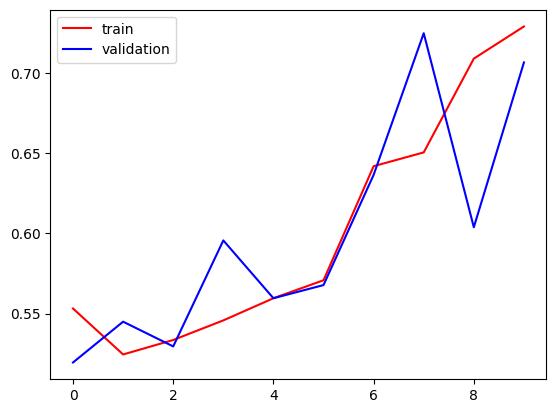

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

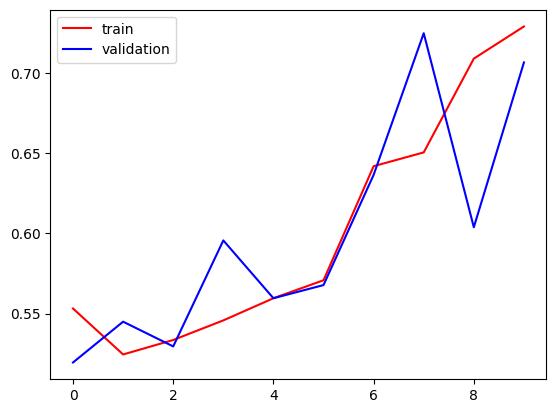

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

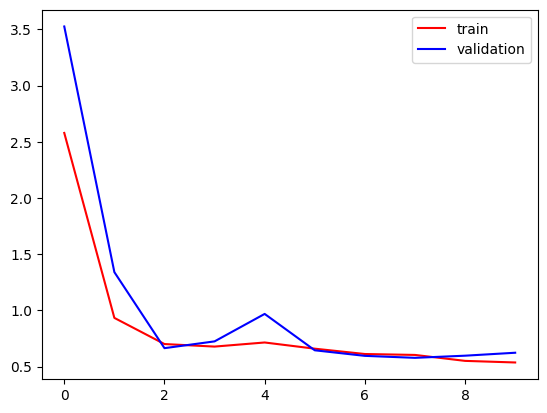

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show

In [ ]:
#need to reduce complexity

#add more data
#reducing complexity

In [ ]:
import cv2

In [ ]:
test_image = cv2.imread('/content/cat.jpeg')

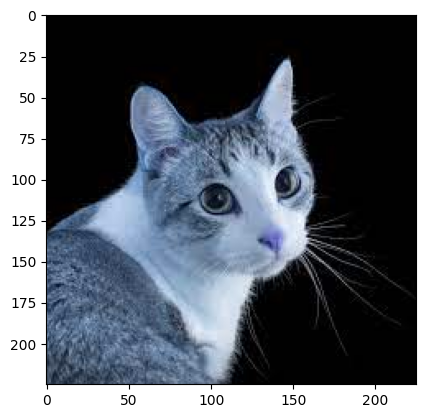

In [ ]:
plt.imshow(test_image)

In [ ]:
test_image.shape

(225, 225, 3)

In [ ]:
test_image = cv2.resize(test_image,(256,256))

In [ ]:
test_input = test_image.reshape(1,256,256,3)

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 219ms/step


array([[0.545237]], dtype=float32)

In [ ]:
test_image = cv2.imread('/content/dog.jpeg')

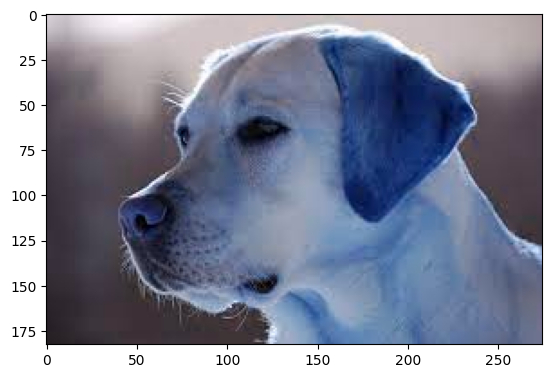

In [ ]:
plt.imshow(test_image)